# Python Project

## Customer Analysis with Python

## About the dataset:

On this project I was trying to figure out the relationship between one product and various customer segments. The purpose was to help the marketing team know what segment groups to focus on while advertising. More specicifically, I worked on the relationship between red meat consumption and various customer segments like marital status groups, different levels of educaton, income level, number of children in the family, etc.

### Importing important packages:

In [13]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt



### Import the dataset:

In [14]:
data=pd.read_csv('marketing_campaign.csv',header=0,sep='\t')

In [15]:
data #have an overview of what the dataset looks like

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Project Target:
It is hard to focus on everything in the dataset. For this project, I will focus on whether each of the following factors (age, spending level, marital status, education level, having kids) have an effect on meat consumption

### Data preparation

###### Look for NAs

In [16]:
np.sum(data.isnull())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

By looking at all columns we are missing about 24 observations in the Income column. Considering that we have about 2240 total observations, removing the missing 24, wouldn't make a great difference for the analysis.

In [17]:
#drop NAs
data=data.dropna(subset=['Income'])

###### Subset only needed columns
I am not going to use all the columns. I need to point out the important ones that I am going to use in the analysis and make needed features from there.

In [18]:
import warnings
warnings.filterwarnings('ignore')

#Spending variable creation
data['Age']=2021-data['Year_Birth']

#Consumption rate
data['Spending']=data['MntWines']+data['MntFruits']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']


data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

data['Children']=data['Kidhome']+data['Teenhome']
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


data=data[['Age','Education','Marital_Status','Income','Spending','Children','Meat']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Children,Meat
0,64,Postgraduate,Alone,58138.0,1071,0,546
1,67,Postgraduate,Alone,46344.0,21,2,6
2,56,Postgraduate,In couple,71613.0,649,0,127
3,37,Postgraduate,In couple,26646.0,33,1,20
4,40,Postgraduate,In couple,58293.0,304,1,118


In [64]:
X = data[['Age','Education','Marital_Status','Income', 'Spending', 'Children']]

In [65]:
Y = data['Meat']

In [21]:
# X = pd.get_dummies(data=X, drop_first=True) #turn categorical variables into dummy variables for better interpretation

In [69]:
# X

In [90]:
ddata=pd.DataFrame(Y).join(pd.DataFrame(X)) #New dataframe after making dummie variables

In [91]:
ddata


,Meat,Age,Education,Marital_Status,Income,Spending,Children
0,546,64,Postgraduate,Alone,58138.0,1071,0
1,6,67,Postgraduate,Alone,46344.0,21,2
2,127,56,Postgraduate,In couple,71613.0,649,0
3,20,37,Postgraduate,In couple,26646.0,33,1
4,118,40,Postgraduate,In couple,58293.0,304,1
...,...,...,...,...,...,...,...
2235,182,54,Postgraduate,In couple,61223.0,1159,1
2236,30,75,Postgraduate,In couple,64014.0,414,3
2237,217,40,Postgraduate,Alone,56981.0,1024,0
2238,214,65,Postgraduate,In couple,69245.0,629,1


In [92]:
ddata.describe().round(2)

,Meat,Age,Income,Spending,Children
count,2216.00,2216.00,2216.00,2216.00,2216.00
mean,167.00,52.18,52247.25,440.08,0.95
std,224.28,11.99,25173.08,430.15,0.75
min,0.00,25.00,1730.00,4.00,0.00
25%,16.00,44.00,35303.00,52.00,0.00
50%,68.00,51.00,51381.50,295.00,1.00
75%,232.25,62.00,68522.00,741.25,1.00
max,1725.00,128.00,666666.00,1798.00,3.00


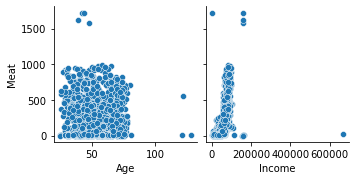

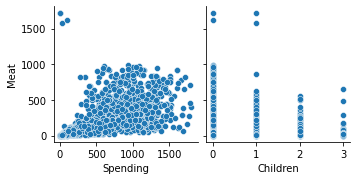

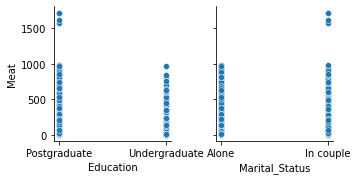

In [73]:
#plots before removing outliers
print(sns.pairplot(ddata, x_vars=('Age','Income'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Spending','Children'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Education','Marital_Status'),y_vars='Meat'))

In [77]:
ddata.corr()[:1] #Correlation between Meat and all other variables

,Meat,Age,Income,Spending,Children
Meat,1.0,0.033697,0.584633,0.664186,-0.504545


### Remove outliers:

In [93]:

ddata.drop(ddata.loc[ddata.Age>100].index, inplace = True)
ddata.drop(ddata.loc[ddata.Income>600000].index, inplace = True)
ddata.drop(ddata.loc[ddata.Meat>1500].index, inplace = True)
ddata

,Meat,Age,Education,Marital_Status,Income,Spending,Children
0,546,64,Postgraduate,Alone,58138.0,1071,0
1,6,67,Postgraduate,Alone,46344.0,21,2
2,127,56,Postgraduate,In couple,71613.0,649,0
3,20,37,Postgraduate,In couple,26646.0,33,1
4,118,40,Postgraduate,In couple,58293.0,304,1
...,...,...,...,...,...,...,...
2235,182,54,Postgraduate,In couple,61223.0,1159,1
2236,30,75,Postgraduate,In couple,64014.0,414,3
2237,217,40,Postgraduate,Alone,56981.0,1024,0
2238,214,65,Postgraduate,In couple,69245.0,629,1


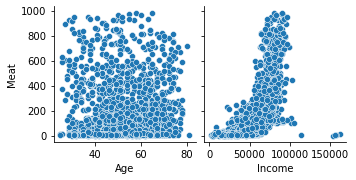

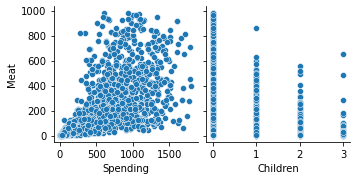

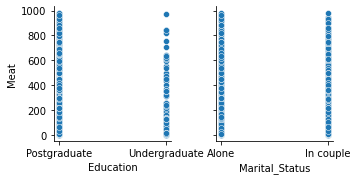

In [96]:
#plots after removing outliers
print(sns.pairplot(ddata, x_vars=('Age','Income'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Spending','Children'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Education','Marital_Status'),y_vars='Meat'))

In [94]:
ddata.describe().round(2)

,Meat,Age,Income,Spending,Children
count,2208.00,2208.00,2208.00,2208.00,2208.00
mean,164.32,52.10,51836.62,440.98,0.95
std,215.19,11.71,21159.73,429.94,0.75
min,0.00,25.00,1730.00,4.00,0.00
25%,16.00,44.00,35233.50,52.00,0.00
50%,68.00,51.00,51369.00,297.50,1.00
75%,231.25,62.00,68413.25,742.00,1.00
max,984.00,81.00,162397.00,1798.00,3.00


In [95]:
ddata.corr()[:1] #Correlation between Meat and all other variables 

,Meat,Age,Income,Spending,Children
Meat,1.0,0.044665,0.696005,0.704517,-0.51867


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
model = LinearRegression()
model.fit(X_train,Y_train)

print(model.intercept_)

# regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
# regr.fit(X_train, Y_train)
# predicted = regr.predict(X_test)
# predicted


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
sns.regplot(Y_test,predictions)

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

### Correcting the data with log

In [80]:
ddata['Spending']= np.log(ddata['Spending'])
ddata['Income']= np.log(ddata['Income'])

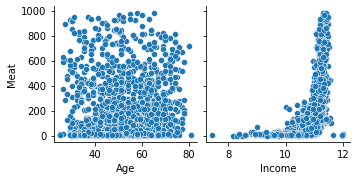

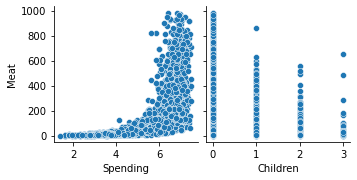

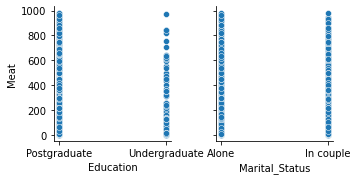

In [81]:
print(sns.pairplot(ddata, x_vars=('Age','Income'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Spending','Children'),y_vars='Meat'))
print(sns.pairplot(ddata, x_vars=('Education','Marital_Status'),y_vars='Meat'))

In [82]:
ddata.corr()[:1] #Correlation between Meat and all other variables 

,Meat,Age,Income,Spending,Children
Meat,1.0,0.044665,0.600898,0.648653,-0.51867


In [85]:
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
# model = LinearRegression()
# model.fit(X_train,Y_train)

# print(model.intercept_)


In [86]:
# coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
# coeff_parameter

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
sns.regplot(Y_test,predictions)

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())